[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MikeS96/cv_dl/blob/main/week2/S2L1_descriptors.ipynb)

In [ ]:
!pip install opencv-contrib-python==3.4.2.16
# 3.4.2.16
# 4.4.0.44

     |████████████████████████████████| 30.6MB 149kB/s 
  Found existing installation: opencv-contrib-python 4.4.0.44
    Uninstalling opencv-contrib-python-4.4.0.44:
      Successfully uninstalled opencv-contrib-python-4.4.0.44


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

## SIFT

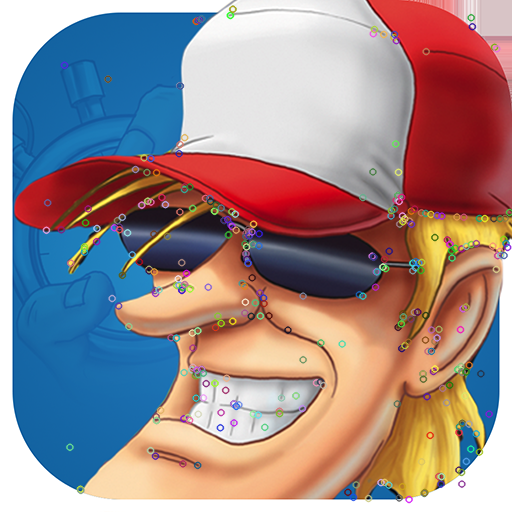

In [ ]:
img = cv2.imread('javierimage.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT.create()
kp = sift.detect(img_gray, None)
img_kp = cv2.drawKeypoints(img, kp, None)
cv2_imshow(img_kp)

## SURF

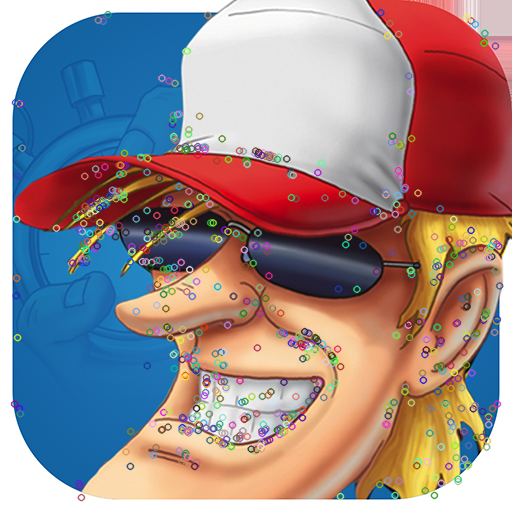

In [ ]:
img = cv2.imread('javierimage.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Mas alto es mas discriminativo el hessian threshold
hessianThreshold = 400
surf = cv2.xfeatures2d.SURF_create(hessianThreshold)
kp = surf.detect(img_gray, None)
img_kp = cv2.drawKeypoints(img, kp, None)
cv2_imshow(img_kp)

## Comparison

The matches are: 47


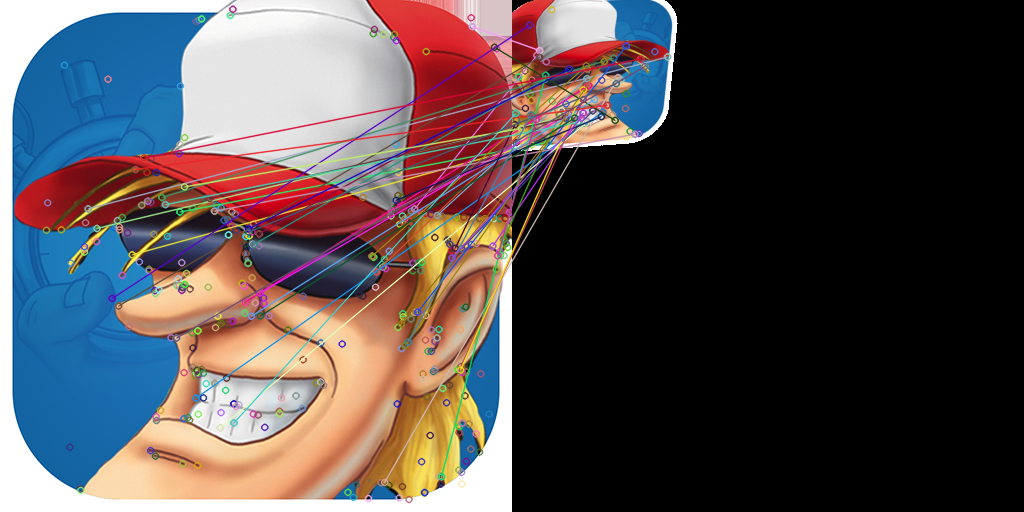

In [ ]:
img = cv2.imread('javierimage.png')
img2 = cv2.imread('javierimage_total.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT.create()
kp1, des1 = sift.detectAndCompute(img_gray, None)
kp2, des2 = sift.detectAndCompute(img_gray2, None)

fbm = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True)
matches = fbm.match(des1, des2)
matches = sorted(matches, key = lambda x: x.distance)
print("The matches are: {}".format(len(matches)))
res = cv2.drawMatches(img, kp1, img2, kp2, matches[:50], None)
cv2_imshow(res)

## FLANN

The matches are: 56


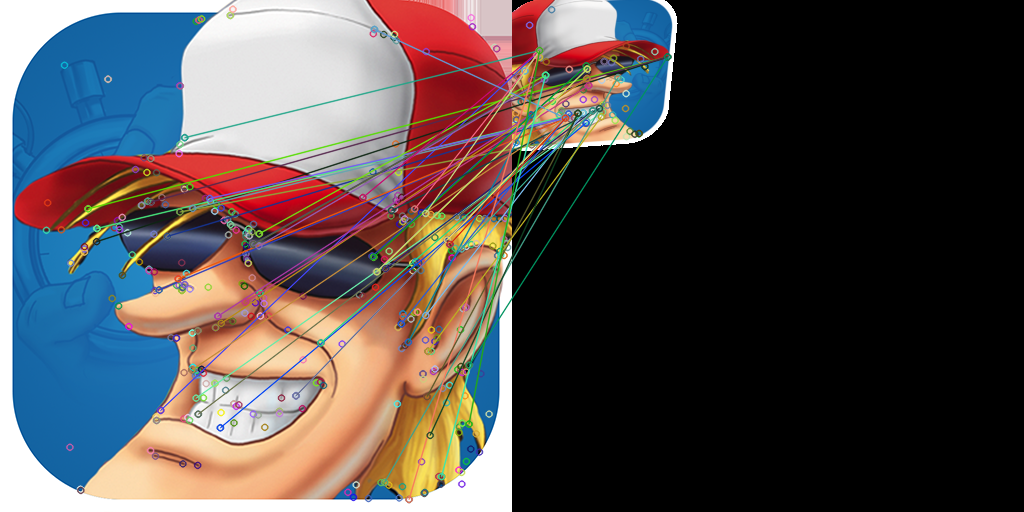

In [ ]:
img = cv2.imread('javierimage.png')
img2 = cv2.imread('javierimage_total.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT.create()
kp1, des1 = sift.detectAndCompute(img_gray, None)
kp2, des2 = sift.detectAndCompute(img_gray2, None)

fbm = cv2.BFMatcher(cv2.NORM_L2)
# K = 2, search for two better results
matches = fbm.knnMatch(des1, des2, k = 2)
matches_good = []
# Matches en imagen 1 (m) y 2 (n)
for m, n in matches:
  # Mayor valor es mas discriminativo
  if m.distance < 0.85 * n.distance:
    matches_good.append(m)

print("The matches are: {}".format(len(matches_good)))
res = cv2.drawMatches(img, kp1, img2, kp2, matches_good[:50], None)
cv2_imshow(res)

## Aplicación

The matches are: 402


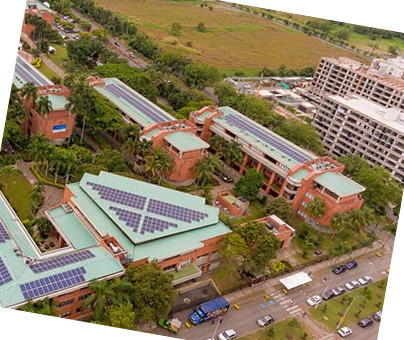

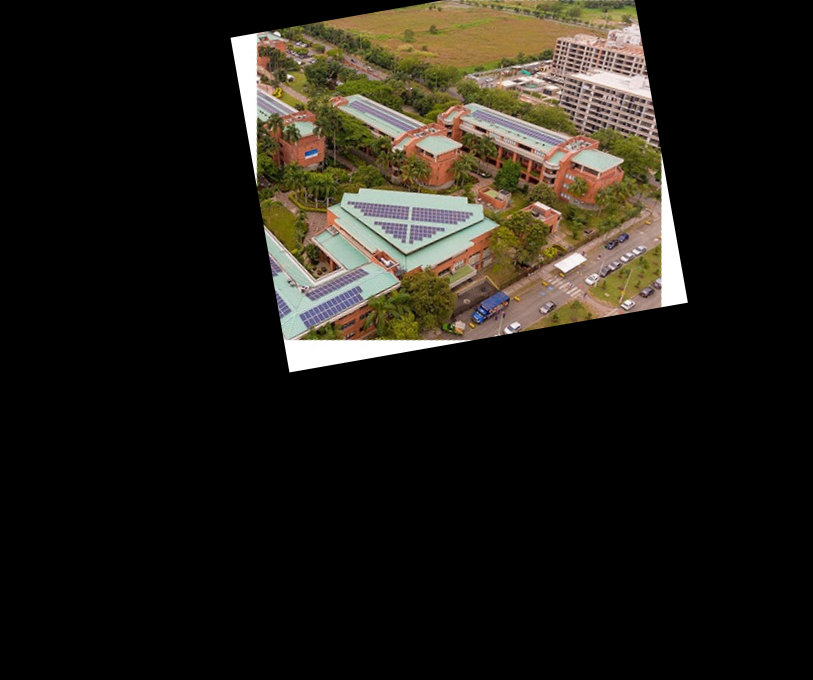

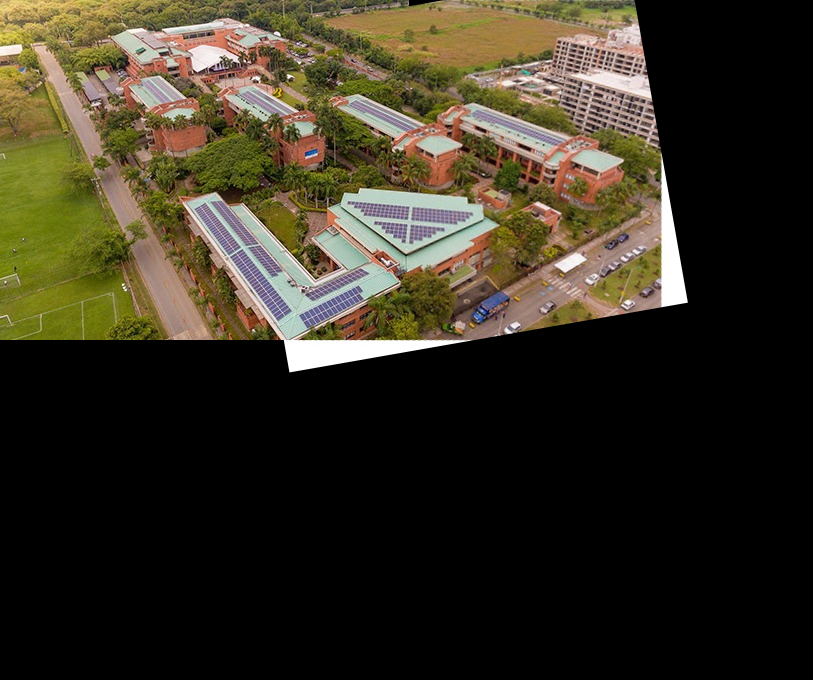

In [ ]:
# Load and process image
img = cv2.imread('uao_1.jpeg')
img2 = cv2.imread('uao_2rot.jpeg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# SIFT object
sift = cv2.SIFT.create()
# Compute keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img_gray, None)
kp2, des2 = sift.detectAndCompute(img_gray2, None)

# Algorithm = 1 KDTREE indexado, trees = 5 ramas
flann_params = dict(algorithm = 1, trees = 5)
# checks = 50 Cuantas veces va a recorrer el arbol
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(flann_params, search_params)
matches = flann.knnMatch(des1, des2, k = 2)
matches_good = []
# Matches en imagen 1 (m) y 2 (n)
for m, n in matches:
  # Mayor valor es mas discriminativo
  if m.distance < 0.75 * n.distance:
    matches_good.append(m)

print("The matches are: {}".format(len(matches_good)))
#res = cv2.drawMatches(img, kp1, img2, kp2, matches_good[:50], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#cv2_imshow(res)

# Minimo legal de puntos 4
MIN_MATCH_COUNT = 10
if len(matches_good) > MIN_MATCH_COUNT:
  # Fuente es Query, destino es train
  # queryIdx are for kp1 and trainIdx for kp2 generates error
  src_pts = np.float32([kp1[m.queryIdx].pt for m in matches_good]).reshape(-1, 1, 2)
  dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches_good]).reshape(-1, 1, 2)
  # RANSAC Threshold 5
  H, status = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)
  width = img_gray2.shape[1] + img_gray.shape[1]
  height = img_gray2.shape[0] + img_gray.shape[0]
  cv2_imshow(img2)
  result = cv2.warpPerspective(img2, H, (width, height))
  cv2_imshow(result)
  result[0:img.shape[0], 0:img.shape[1]] = img
  cv2_imshow(result)